In [32]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [59]:
class Dice:
    # Constructor to set sides (by default sides = 6)
    def __init__(self, sides=6):
        if not isinstance(sides, int) or sides <= 3:
            raise Exception("Cannot construct the dice")
        self.sides = sides
        self.probabilities = [1 / sides] * sides

    # Method to set the probability distribution; By default, all sides have equal probability
    def setProb(self, probabilities):
        if not isinstance(probabilities, tuple) or len(probabilities) != self.sides or not all(0 <= prob <= 1 for prob in probabilities) or abs(sum(probabilities) - 1) > 1e-6:
            raise Exception("Invalid probability distribution.")
        # if not all(0 <= prob <= 1 for prob in probabilities):
        #     raise ValueError("Probabilities should be in the range [0, 1].")
        # if abs(sum(probabilities) - 1) > 1e-6:
        #     raise ValueError("Probabilities should sum to 1.")
        self.probabilities = probabilities

    # Method to roll the dice n times and plot the actual and expected number of occurrences for each face
    def roll(self,n):
        if not isinstance(n, int) or n <= 0:
            raise ValueError("Number of throws should be a positive integer.")

        outcomes = np.random.choice(self.sides, n, p=self.probabilities)
    
        # Calculate the actual number of occurrences for each face
        actual_counts = np.bincount(outcomes, minlength=len(self.probabilities))
        
        # Calculate the expected number of occurrences based on probabilities
        expected_counts = np.array([int(n * prob) for prob in self.probabilities])
        
        # Create a bar chart
        x = np.arange(1, len(self.probabilities) + 1)
        width = 0.35

        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
        rects2 = ax.bar(x + width/2, expected_counts, width, label='Expected')

        # Add labels, title, and legend
        ax.set_xlabel('Sides')
        ax.set_ylabel('Occurrences')
        ax.set_title(f'Outcome of {n} throws of a 4-faced dice')
        ax.set_xticks(x)
        ax.legend()
    
    def __str__(self):
        return f"Dice with {self.sides} sides and probability distribution {self.probabilities}"

### Example 1 - Equal Probability for all Faces

Dice with 4 sides and probability distribution [0.25, 0.25, 0.25, 0.25]


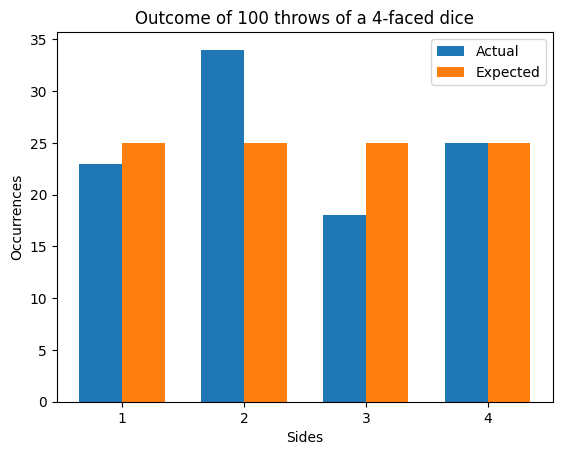

In [60]:
d = Dice(4)
print(d)
d.roll(100)

### Example 2 - Faces have different probabilities

Dice with 4 sides and probability distribution (0.1, 0.2, 0.3, 0.4)


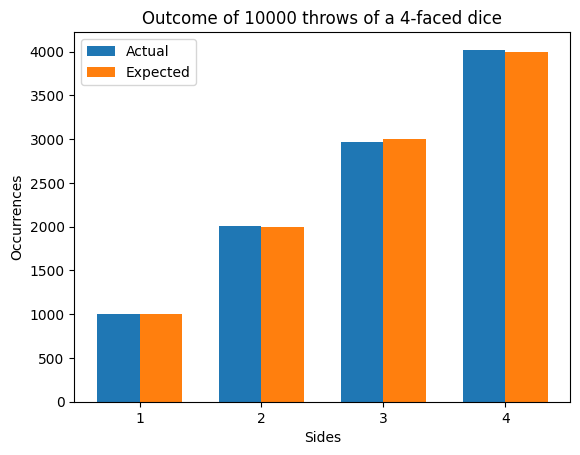

In [58]:
d = Dice(4)
d.setProb((0.1, 0.2, 0.3, 0.4))
print(d)
d.roll(10000)